In [34]:
# loading libraries

import warnings, scipy
warnings.filterwarnings('ignore')
import pandas as pd, numpy as np, seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import nbinom
import matplotlib as mpl
from sklearn.feature_selection import chi2
from scipy import stats
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## Data preprocessing

In [ ]:
data = pd.read_excel("Schistosomiasis_count_data.xlsx")

In [ ]:
data

### Age groups: 4-9, 10-15, >15

In [172]:
# The function classifies the ages into the groups: "<10, 10-15, >15"

def classifyAge(age_):
    if age_ < 10:
        return "<10"
    elif 10 <= age_ <= 15:
        return "10-15"
    else:
        return ">15"

### Educational level: preschool, primary and junior high

In [174]:
# This function groups the children classes into their educational level (Pre school, Primary, Junior)

def classifyClass(class_):
    value = str(class_)[0]
    
    if type(value) == str and (value == "N" or value == "K"):
        return "PreSchool"

    elif type(value) == str and value == "J":
        return "JuniorHigh"

    else:
        return "Primary"

In [176]:
# creating columns for each groupings

data["Age_group"] = data["Age"].apply(classifyAge)  # creates the age group column
data["EduLevel"] = data["Class"].apply(classifyClass)   # creates a column with their class grouped into their educational level 
data["Area"] = data["Community"].apply(lambda x: "Rural" if x in ["Agbedrafor", "Anyamam", "Goi", "Koluedor", "Toflokpo"] else "Urban")   # creates a column to group communities into "rural" and "urban"

NameError: name 'data' is not defined

In [177]:
# shuffle the dataFrame rows

#data = data.sample(frac = 1)

In [ ]:
# uncomment the syntax below to 

#data.to_xlsx('Dataset.xlsx')

# <center> Analysis and figures plotting <hr/>

In [2]:
df = pd.read_excel('Dataset.xlsx') # getting data

In [3]:
df.columns   # columns

Index(['Age', 'Sex', 'Class', 'Community', 'S_haematobium', 'S_mansoni',
       'Parent_Occupation', 'Pipe_borne', 'Tanker_treated', 'Tanker_Untreated',
       'River_Stream', 'Well_Borehole', 'Age_group', 'EduLevel', 'Area',
       'schistosomiasis'],
      dtype='object')

In [4]:
df   # data

,Age,Sex,Class,Community,S_haematobium,S_mansoni,Parent_Occupation,Pipe_borne,Tanker_treated,Tanker_Untreated,River_Stream,Well_Borehole,Age_group,EduLevel,Area,schistosomiasis
0,12,F,3B,Anyamam,0,0,Fishing,False,False,True,False,False,10-15,Primary,Rural,0
1,13,F,Jss1 Red,Greenhill,0,0,Others,True,False,False,False,False,10-15,JuniorHigh,Urban,0
2,13,F,5,Greenhill,0,0,Others,True,False,False,False,False,10-15,Primary,Urban,0
3,9,M,3,Greenhill,0,0,Others,False,False,False,False,True,<10,Primary,Urban,0
4,17,M,4,Pantang,0,0,Others,False,False,False,False,True,>15,Primary,Urban,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1340,11,M,5,DeYoungsters,0,0,Others,True,False,False,False,False,10-15,Primary,Urban,0
1341,13,M,6 Green,Greenhill,0,0,Others,True,False,False,False,False,10-15,Primary,Urban,0
1342,11,M,5,Greenhill,0,0,Others,True,False,False,False,False,10-15,Primary,Urban,0
1343,11,F,5,Greenhill,0,0,Others,True,False,False,False,False,10-15,Primary,Urban,0


## Data Desciption

* 1345 participants
* 635 males and 710 females
* Educational level (Preschool, primary and Junior High)
* Age group (in years) - <10, 10-15, >15
* Area of residence - rural and urban
* Parent's Occupation group - Farming, Fishing and Others
* Water sources are pipe borne, tanker (treated), tanker (untreated), river/stream, well/borehore

In [5]:
#Number of positive individuals

positive_df = df[df['schistosomiasis'] > 0]  # dataframe of individuals infected with schistosomiasis
print('The number of positive individuals are ', positive_df.shape[0])   # the total number infected
print('The percentage of the number of positives is ', round(positive_df.shape[0]/df.shape[0]*100, 1),'%')   # prints out the percentage of positive persons
print('The percentage of the number of negatives is ', 100 - round(positive_df.shape[0]/df.shape[0]*100, 1),'%')   # prints out the percentage of negative persons

The number of positive individuals are  80
The percentage of the number of positives is  5.9 %
The percentage of the number of negatives is  94.1 %


In [6]:
# Schistosomiasis data description (for both negatives and positives)

print("The schistosomiasis count description (for both negative and positive) is")
print(df.describe()['schistosomiasis'])                 # gives a summary of the whole data
print("")

# Schistiosomiasis positives description

print("The schistosomiasis positive count description is")
print(positive_df.describe()['schistosomiasis'])      # gives a summary of the positive persons
print('')
print('The variance of the schistosomiasis positive counts is ', positive_df['schistosomiasis'].var())

The schistosomiasis count description (for both negative and positive) is
count    1345.00000
mean        1.98513
std        16.93382
min         0.00000
25%         0.00000
50%         0.00000
75%         0.00000
max       296.00000
Name: schistosomiasis, dtype: float64

The schistosomiasis positive count description is
count     80.000000
mean      33.375000
std       61.786356
min        1.000000
25%        2.000000
50%        8.000000
75%       29.000000
max      296.000000
Name: schistosomiasis, dtype: float64

The variance of the schistosomiasis positive counts is  3817.5537974683543


## Count Visualization

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


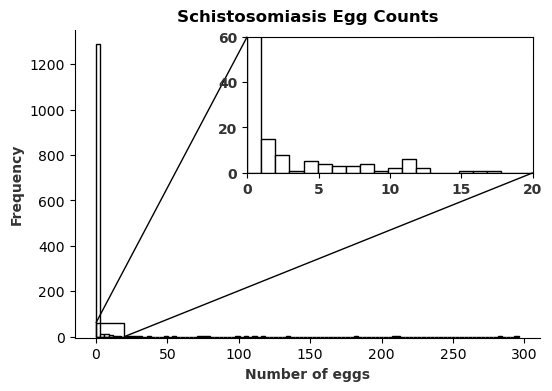

In [7]:
# histogram showing the schistosomiasis egg distribution 

fig, ax = plt.subplots(figsize=(6,4))
extent = (0, 100, 0, 50)
ax.hist(df['schistosomiasis'].values, label = 'Counts', bins = 100, color= 'white', edgecolor='black')
ax.set_xlabel('Number of eggs', weight = "bold", color = "0.2")
ax.set_ylabel('Frequency', weight = "bold", color = "0.2")
plt.title('Schistosomiasis Egg Counts', weight='bold')
plt.ylim(bottom = -5)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
axins = zoomed_inset_axes(ax, 10, loc=1) 
axins.hist(df['schistosomiasis'].values, label = 'Counts', bins = 300, color='white', edgecolor='black')
ax.legend()
axins.set_xlim(0, 20)
axins.set_ylim(0, 60)
plt.xticks(visible=True, weight = "bold", color = "0.2")
plt.yticks(visible=True, weight = "bold", color = "0.2")
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0")
plt.draw()

plt.savefig('Figures\\figure1A.eps', format = 'EPS', bbox_inches = 'tight')

plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


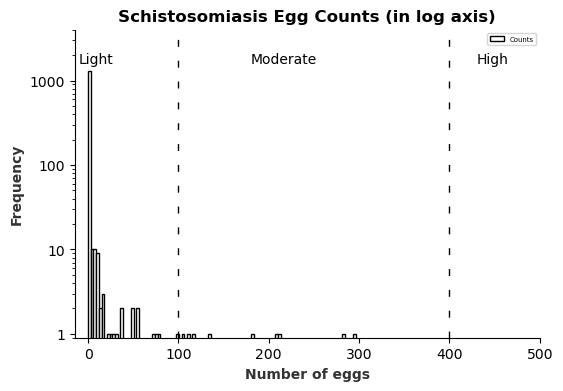

In [8]:
# Schistosomiasis distribution plot in log axis; also describing infection intensity regions.


plt.figure(figsize = (6,4))
plt.hist(df['schistosomiasis'], bins = 100, log = True, label = 'Counts', color = 'white', edgecolor='black')
plt.xlabel('Number of eggs', weight = "bold", color = "0.2")
plt.ylabel('Frequency', weight = "bold", color = "0.2")
plt.xticks([0,100,200,300,400,500])
plt.yticks([0,1,10,100,1000],['0','1','10','100','1000'])
plt.title('Schistosomiasis Egg Counts (in log axis)', weight='bold')
plt.legend(loc = 'upper right', fontsize = "5")
plt.ylim(0.9,4000)
plt.grid(False)
plt.axvline(x = 100, color = 'black', lw = 1, linestyle = (0, (5, 10)))
plt.axvline(x = 400, color = 'black', lw = 1, linestyle = (0, (5, 10)))
plt.annotate('High', (430,1600), annotation_clip=False)
plt.annotate('Moderate', (180,1600), annotation_clip=False)
plt.annotate('Light',(-10,1600), annotation_clip=False)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig('Figures\\figure1B.eps', format = 'EPS', bbox_inches = 'tight')

plt.show()

## Grouping by infection intensity 

In [9]:
# getting each intensity data (without zeros)

light_intensity = df[(df['schistosomiasis'] > 0) & (df['schistosomiasis'] < 100)] # egg counts in 1-99 range with zeros
moderate_intensity = df[(df['schistosomiasis'] > 100) & (df['schistosomiasis'] < 400)]  # egg counts in 100-399 range # with zeros
high_intensity = df[df['schistosomiasis'] >= 400]   # egg counts in 400 and above range

In [10]:
# summary description of light, moderate and hight intensity counts

print("LOW INTENSITY\n-------------")
print("Mean: ", round(light_intensity['schistosomiasis'].mean(),1))
print("Variance: ", round(light_intensity['schistosomiasis'].var(),1))
print("Standard deviation: ", round(light_intensity['schistosomiasis'].std(),1), "\n")

print("MODERATE INTENSITY\n------------------")
print("Mean: ", round(moderate_intensity['schistosomiasis'].mean(),1))
print("Variance: ", round(moderate_intensity['schistosomiasis'].var(),1))
print("Standard deviation: ", round(moderate_intensity['schistosomiasis'].std(),1), "\n")

print("HIGH INTENSITY\n--------------")
print("Mean: ", round(high_intensity['schistosomiasis'].mean(),1))
print("Variance: ", round(high_intensity['schistosomiasis'].var(),1))
print("Standard deviation: ", round(high_intensity['schistosomiasis'].std(),1))

LOW INTENSITY
-------------
Mean:  14.3
Variance:  438.1
Standard deviation:  20.9 

MODERATE INTENSITY
------------------
Mean:  183.6
Variance:  5275.0
Standard deviation:  72.6 

HIGH INTENSITY
--------------
Mean:  nan
Variance:  nan
Standard deviation:  nan


## Finding overdispersion parameter

In [11]:
# fitting for all the count data

count = np.array(df['schistosomiasis'])
X1 = np.ones_like(count)
results = sm.NegativeBinomial(count,X1).fit(start_params = [1,1])
results.summary()

Optimization terminated successfully.
         Current function value: 0.463791
         Iterations: 16
         Function evaluations: 17
         Gradient evaluations: 17


<class 'statsmodels.iolib.summary.Summary'>
"""
                     NegativeBinomial Regression Results                      
==============================================================================
Dep. Variable:                      y   No. Observations:                 1345
Model:               NegativeBinomial   Df Residuals:                     1344
Method:                           MLE   Df Model:                            0
Date:                Wed, 03 Apr 2024   Pseudo R-squ.:              -5.815e-09
Time:                        06:54:06   Log-Likelihood:                -623.80
converged:                       True   LL-Null:                       -623.80
Covariance Type:            nonrobust   LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6864      0.250      2.746      0.006       0.197       1.176
alpha         83.4499     10.432      7.999      0.000      63.003     103.897
==============================================================================
"""

Here, the overdispersion parameter $\alpha = 83.4$ 

In [12]:
# fitting for low intensity count data

In [13]:
low_count = count[count < 100]
X2 = np.ones_like(low_count)
results2 = sm.NegativeBinomial(low_count, X2).fit(start_params = [1,1])
results2.summary()

Optimization terminated successfully.
         Current function value: 0.390741
         Iterations: 16
         Function evaluations: 17
         Gradient evaluations: 17


<class 'statsmodels.iolib.summary.Summary'>
"""
                     NegativeBinomial Regression Results                      
==============================================================================
Dep. Variable:                      y   No. Observations:                 1336
Model:               NegativeBinomial   Df Residuals:                     1335
Method:                           MLE   Df Model:                            0
Date:                Wed, 03 Apr 2024   Pseudo R-squ.:              -2.874e-09
Time:                        06:54:07   Log-Likelihood:                -522.03
converged:                       True   LL-Null:                       -522.03
Covariance Type:            nonrobust   LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2716      0.238     -1.143      0.253      -0.737       0.194
alpha         74.0379     10.141      7.301      0.000      54.162      93.914
==============================================================================
"""

The overdispersion parameter the low intensity count data is $\alpha = 74$

In [35]:
# fitting for positive count data

positive_count = count[count > 0]
X3 = np.ones_like(positive_count)
results3 = sm.NegativeBinomial(positive_count, X3).fit(start_params = [1,1])
results3.summary()

Optimization terminated successfully.
         Current function value: 4.299190
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                     NegativeBinomial Regression Results                      
==============================================================================
Dep. Variable:                      y   No. Observations:                   80
Model:               NegativeBinomial   Df Residuals:                       79
Method:                           MLE   Df Model:                            0
Date:                Wed, 03 Apr 2024   Pseudo R-squ.:               2.414e-12
Time:                        07:42:14   Log-Likelihood:                -343.94
converged:                       True   LL-Null:                       -343.94
Covariance Type:            nonrobust   LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5078      0.163     21.467      0.000       3.188       3.828
alpha          2.1060      0.285      7.378      0.000       1.547       2.665
==============================================================================
"""

The overdispersion parameter the low intensity count data is $\alpha = 2.1$

## Model's AIC values

In [21]:
# these AIC values were generated in R after model fitting

AIC_all5 = pd.read_excel('aic_bic_values\AIC_all5.xlsx')   # the AIC value for using 5 predictors and all sample data
AIC_all10 = pd.read_excel('aic_bic_values\AIC_all10.xlsx')   # the AIC value for using 10 redictors and all sample data
AIC_low5 = pd.read_excel('aic_bic_values\AIC_low5.xlsx')   # the AIC value for using 5 predictors and the low intensity data
AIC_low10 = pd.read_excel('aic_bic_values\AIC_low10.xlsx')    # the AIC value for using 10 predictors and the low intensity data

In [22]:
# rearranging (attaching model description next to it) to plot it

for result in [AIC_all5, AIC_all10, AIC_low5, AIC_low10]:
    result['Type'] = ['Standard','Standard', 'Zero-inflated', 'Zero-inflated', 'Hurdle', 'Hurdle']
    result['Kind'] = ['Poisson', 'NB', 'Poisson', 'NB', 'Poisson', 'NB']
    print(result)
    print("")

   df           AIC           Type     Kind
0   9  14703.904805       Standard  Poisson
1   9   3463.895128       Standard       NB
2  18   4828.667758  Zero-inflated  Poisson
3  19   1205.937352  Zero-inflated       NB
4  18   4828.555695         Hurdle  Poisson
5  19   1203.267135         Hurdle       NB

   df           AIC           Type     Kind
0  14  14127.755686       Standard  Poisson
1  14   3215.557861       Standard       NB
2  28   4404.559130  Zero-inflated  Poisson
3  29   1208.786699  Zero-inflated       NB
4  28   4404.859972         Hurdle  Poisson
5  29   1207.171225         Hurdle       NB

   df          AIC           Type     Kind
0   9  6533.005064       Standard  Poisson
1   9  2644.912357       Standard       NB
2  18  2069.913405  Zero-inflated  Poisson
3  19  1024.083515  Zero-inflated       NB
4  18  2069.906040         Hurdle  Poisson
5  19  1024.503337         Hurdle       NB

   df          AIC           Type     Kind
0  14  6206.602529       Standard  Po

In [23]:
AIC_all10

,df,AIC,Type,Kind
0,14,14127.755686,Standard,Poisson
1,14,3215.557861,Standard,NB
2,28,4404.559130,Zero-inflated,Poisson
3,29,1208.786699,Zero-inflated,NB
4,28,4404.859972,Hurdle,Poisson
5,29,1207.171225,Hurdle,NB


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


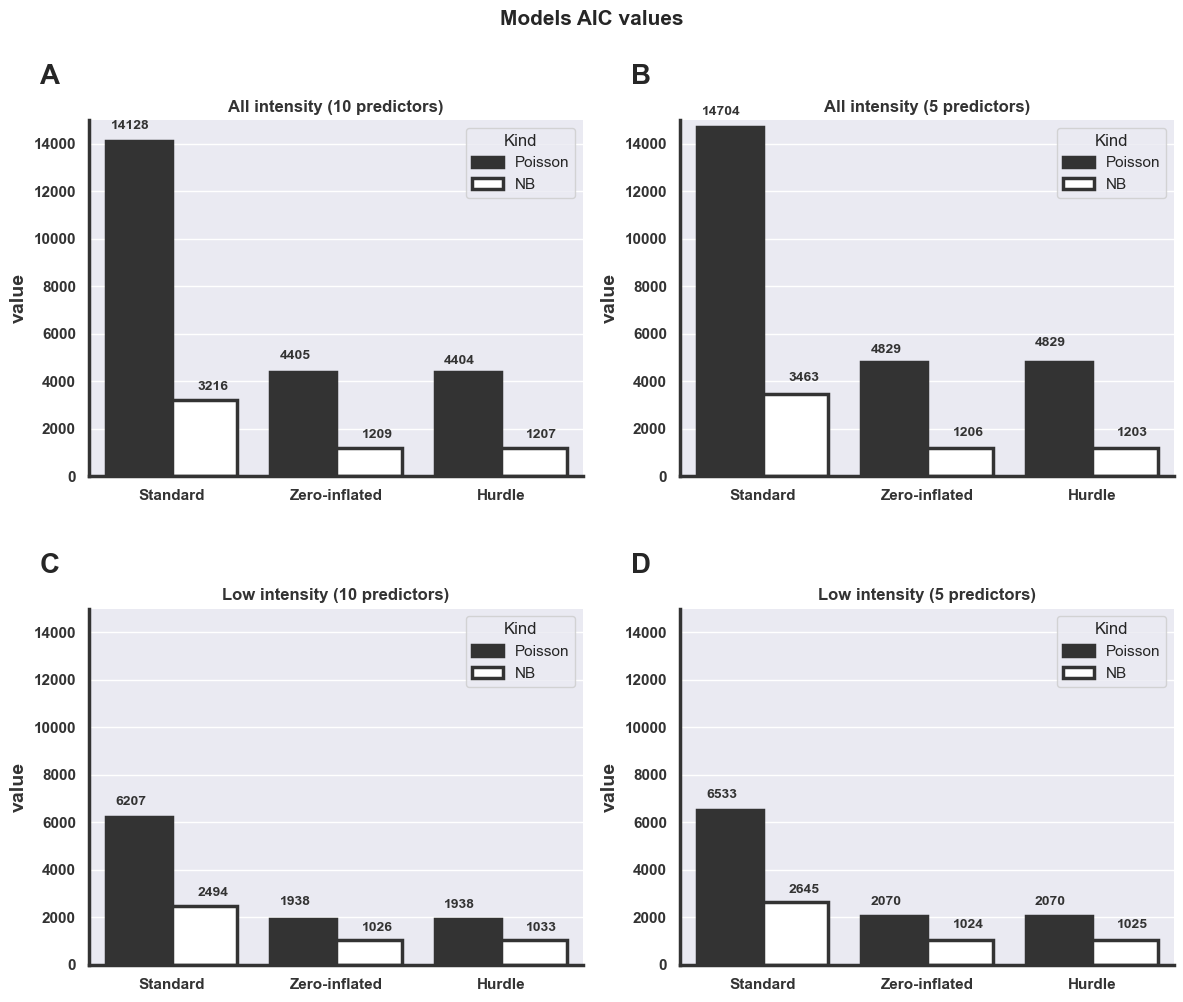

In [54]:
'''
barplot of each model's aic values plot against each other for comparison
'''

sns.set_theme()

plt.figure(figsize = (12,10))

plt.subplot(2,2,1)
ax = sns.barplot(data = AIC_all10, x = 'Type', y = 'AIC', capsize = 0.25, edgecolor = '0.2', lw = 2.5, errwidth = 2.5, palette = ['0.2', 'white'], errcolor = '0.2', hue = 'Kind')
max_val = AIC_all10.max()[1]
for axis in ['bottom', 'left']:
    ax.spines[axis].set_linewidth(2.5)
    ax.spines[axis].set_color('0.2')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xticks(ha = 'center', weight = 'bold', color = '0.2')
plt.yticks(weight = 'bold', color = '0.2')
ax.tick_params(width = 2.5, color = '0.2')
plt.xlabel('')
plt.ylabel('value', size = 14, weight = 'bold', color = '0.2')

plt.text(x = -0.25, y = max_val+500, s = "14128", ha = "center", size = 10, weight = "bold", color = "0.2")
plt.text(x = 0.25, y = max_val-10500, s = "3216", ha = "center", size = 10, weight = "bold", color = "0.2")
plt.text(x = 0.75, y = max_val-9200, s = "4405", ha = "center", size = 10, weight = "bold", color = "0.2")
plt.text(x = 1.25, y = max_val-12500, s = "1209", ha = "center", size = 10, weight = "bold", color = "0.2")
plt.text(x = 1.75, y = max_val-9400, s = "4404", ha = "center", size = 10, weight = "bold", color = "0.2")
plt.text(x = 2.25, y = max_val-12500, s = "1207", ha = "center", size = 10, weight = "bold", color = "0.2")
plt.text(-0.1, 1.1, "A", transform=ax.transAxes, size=20, weight='bold') 
plt.ylim(top = 15000)
plt.title('All intensity (10 predictors)', weight = 'bold', color = '0.2') 

# new

plt.subplot(2,2,2)
ax = sns.barplot(data = AIC_all5, x = 'Type', y = 'AIC', capsize = 0.25, edgecolor = '0.2', lw = 2.5, errwidth = 2.5, palette = ['0.2', 'white'], errcolor = '0.2', hue = 'Kind')
max_val = AIC_all5.max()[1]
for axis in ['bottom', 'left']:
    ax.spines[axis].set_linewidth(2.5)
    ax.spines[axis].set_color('0.2')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xticks(ha = 'center', weight = 'bold', color = '0.2')
plt.yticks(weight = 'bold', color = '0.2')
ax.tick_params(width = 2.5, color = '0.2')
plt.xlabel('')
plt.ylabel('value', size = 14, weight = 'bold', color = '0.2')

plt.text(x = -0.25, y = max_val+500, s = "14704", ha = "center", size = 10, weight = "bold", color = "0.2")
plt.text(x = 0.25, y = max_val-10700, s = "3463", ha = "center", size = 10, weight = "bold", color = "0.2")
plt.text(x = 0.75, y = max_val-9500, s = "4829", ha = "center", size = 10, weight = "bold", color = "0.2")
plt.text(x = 1.25, y = max_val-13000, s = "1206", ha = "center", size = 10, weight = "bold", color = "0.2")
plt.text(x = 1.75, y = max_val-9200, s = "4829", ha = "center", size = 10, weight = "bold", color = "0.2")
plt.text(x = 2.25, y = max_val-13000, s = "1203", ha = "center", size = 10, weight = "bold", color = "0.2")
plt.text(-0.1, 1.1, "B", transform=ax.transAxes, size=20, weight='bold') 
plt.ylim(top = 15000)
plt.title('All intensity (5 predictors)', weight = 'bold', color = '0.2') 

plt.subplot(2,2,3)
ax = sns.barplot(data = AIC_low10, x = 'Type', y = 'AIC', capsize = 0.25, edgecolor = '0.2', lw = 2.5, errwidth = 2.5, palette = ['0.2', 'white'], errcolor = '0.2', hue = 'Kind')
max_val = AIC_low10.max()[1]
for axis in ['bottom', 'left']:
    ax.spines[axis].set_linewidth(2.5)
    ax.spines[axis].set_color('0.2')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xticks(ha = 'center', weight = 'bold', color = '0.2')
plt.yticks(weight = 'bold', color = '0.2')

ax.tick_params(width = 2.5, color = '0.2')

plt.xlabel('')
plt.ylabel('value', size = 14, weight = 'bold', color = '0.2')


plt.text(x = -0.25, y = max_val+500, s = "6207", ha = "center", size = 10, weight = "bold", color = "0.2")
plt.text(x = 0.25, y = max_val-3300, s = "2494", ha = "center", size = 10, weight = "bold", color = "0.2")
plt.text(x = 0.75, y = max_val-3700, s = "1938", ha = "center", size = 10, weight = "bold", color = "0.2")
plt.text(x = 1.25, y = max_val-4800, s = "1026", ha = "center", size = 10, weight = "bold", color = "0.2")
plt.text(x = 1.75, y = max_val-3800, s = "1938", ha = "center", size = 10, weight = "bold", color = "0.2")
plt.text(x = 2.25, y = max_val-4800, s = "1033", ha = "center", size = 10, weight = "bold", color = "0.2")

plt.title('Low intensity (10 predictors)', weight = 'bold', color = '0.2') 
plt.text(-0.1, 1.1, "C", transform=ax.transAxes, size=20, weight='bold') 

plt.ylim(top = 15000)

plt.subplot(2,2,4)

ax = sns.barplot(data = AIC_low5, x = 'Type', y = 'AIC', capsize = 0.25, edgecolor = '0.2', lw = 2.5, errwidth = 2.5, palette = ['0.2', 'white'], errcolor = '0.2', hue = 'Kind')

max_val = AIC_low5.max()[1]

for axis in ['bottom', 'left']:
    ax.spines[axis].set_linewidth(2.5)
    ax.spines[axis].set_color('0.2')
    
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xticks( ha = 'center', weight = 'bold', color = '0.2')
plt.yticks( weight = 'bold', color = '0.2')

ax.tick_params(width = 2.5, color = '0.2')

plt.xlabel('')
plt.ylabel('value', size = 14, weight = 'bold', color = '0.2')

plt.text(x = -0.25, y = max_val+500, s = "6533", ha = "center", size = 10, weight = "bold", color = "0.2")
plt.text(x = 0.25, y = max_val-3500, s = "2645", ha = "center", size = 10, weight = "bold", color = "0.2")
plt.text(x = 0.75, y = max_val-4000, s = "2070", ha = "center", size = 10, weight = "bold", color = "0.2")
plt.text(x = 1.25, y = max_val-5000, s = "1024", ha = "center", size = 10, weight = "bold", color = "0.2")
plt.text(x = 1.75, y = max_val-4000, s = "2070", ha = "center", size = 10, weight = "bold", color = "0.2")
plt.text(x = 2.25, y = max_val-5000, s = "1025", ha = "center", size = 10, weight = "bold", color = "0.2")
plt.ylim(top = 15000)

plt.title('Low intensity (5 predictors)', weight = 'bold', color = '0.2') 
plt.text(-0.1, 1.1, "D", transform=ax.transAxes, size=20, weight='bold') 



plt.suptitle('Models AIC values', x=0.5, y = 1, fontweight = 'bold', fontsize = 15)
plt.tight_layout(h_pad = 3)

plt.savefig('Figures\\figure2.eps', format = 'EPS', bbox_inches = 'tight')

plt.show()

## Model's Observed and Expected Values

In [53]:
'''
Loading model results - these datasets contains each models expected and observed values.

"{modelname}_results" is the assigned name to each each model results
Each data has the columns:
    observed - the observed frequencies
    expected - the model's expected frequencies
    x - number of eggs per gram
    y - zeros
    width - width of histogram bars
    height - square root of the observed frequencies
    line - square root of the expected frequencies
'''


poisson_results = pd.read_excel("model results\\poisson_results.xlsx")
negbin_results = pd.read_excel("model results\\negbin_results.xlsx")
zip_results = pd.read_excel("model results\\zip_results.xlsx")
zinb_results = pd.read_excel("model results\\zinb_results.xlsx")
hurdlePoisson_results = pd.read_excel("model results\\hurdlePoisson_results.xlsx")
hurdleNB_results = pd.read_excel("model results\\hurdleNB_results.xlsx")

In [52]:
negbin_results

,observed,expected,x,y,width,height,line
0,1265,852.604338,0,0,0.9,35.566838,29.199389
1,15,195.741706,1,0,0.9,3.872983,13.990772
2,8,80.162898,2,0,0.9,2.828427,8.953374
3,1,43.851369,3,0,0.9,1.000000,6.622037
4,5,28.979382,4,0,0.9,2.236068,5.383250
5,4,21.443595,5,0,0.9,2.000000,4.630723
6,3,16.899480,6,0,0.9,1.732051,4.110898
7,3,13.795698,7,0,0.9,1.732051,3.714256
8,4,11.497782,8,0,0.9,2.000000,3.390838
9,1,9.709108,9,0,0.9,1.000000,3.115944


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


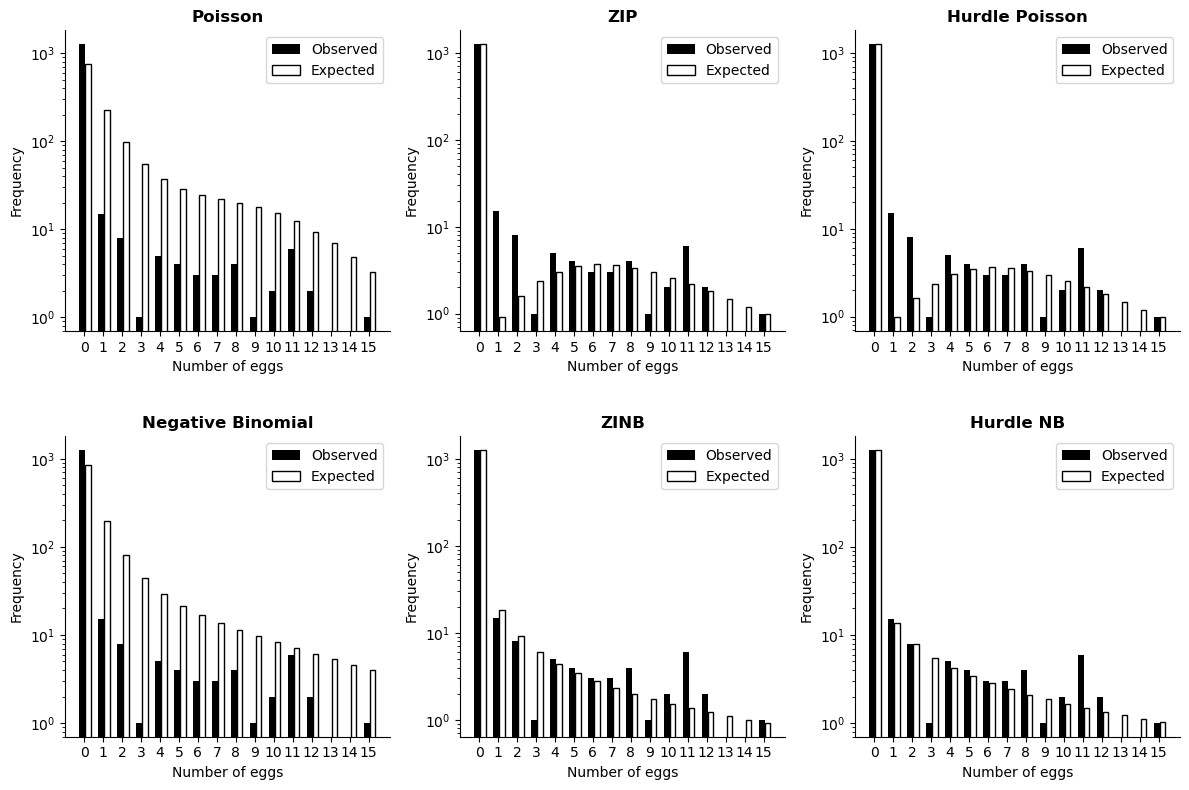

In [50]:
'''
Bar plot of the expected values plotted against the observed values in log axis

''' 


plt.style.use('default')
plt.figure(figsize = (12,8))

plt.subplot(2,3,1)
plt.bar(poisson_results['x'].values[:16] - 0.1, poisson_results['observed'].values[0:16], width = 0.3, color = 'black', 
        label = 'Observed', log = True)
plt.bar(poisson_results['x'].values[:16] + 0.2, poisson_results['expected'].values[0:16], width = 0.3, color='white', 
        edgecolor='black', label = 'Expected',
       log = True)
plt.grid(False)
plt.legend()
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title('Poisson', fontweight='bold')
plt.xlabel('Number of eggs')
plt.ylabel('Frequency')
plt.xticks(np.arange(16))



plt.subplot(2,3,4)
plt.bar(negbin_results['x'].values[:16] - 0.1, negbin_results['observed'].values[0:16], width = 0.3, color = 'black', 
        label = 'Observed', log = True)
plt.bar(negbin_results['x'].values[:16] + 0.2, negbin_results['expected'].values[0:16], width = 0.3, color='white', 
        edgecolor='black', label = 'Expected',
       log = True)
plt.grid(False)
plt.legend()
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title('Negative Binomial', fontweight='bold')
plt.xlabel('Number of eggs')
plt.ylabel('Frequency')
plt.xticks(np.arange(16))



plt.subplot(2,3,2)
plt.bar(zip_results['x'].values[:16] - 0.1, zip_results['observed'].values[0:16], width = 0.3, color = 'black', 
        label = 'Observed', log = True)
plt.bar(zip_results['x'].values[:16] + 0.2, zip_results['expected'].values[0:16], width = 0.3, color='white', 
        edgecolor='black', label = 'Expected',
       log = True)
plt.grid(False)
plt.legend()
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title('ZIP', fontweight='bold')
plt.xlabel('Number of eggs')
plt.ylabel('Frequency')
plt.xticks(np.arange(16))



plt.subplot(2,3,5)
plt.bar(zinb_results['x'].values[:16] - 0.1, zinb_results['observed'].values[0:16], width = 0.3, color = 'black', 
        label = 'Observed', log = True)
plt.bar(zinb_results['x'].values[:16] + 0.2, zinb_results['expected'].values[0:16], width = 0.3, color='white', 
        edgecolor='black', label = 'Expected',
       log = True)
plt.grid(False)
plt.legend()
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title('ZINB', fontweight='bold')
plt.xlabel('Number of eggs')
plt.ylabel('Frequency')
plt.xticks(np.arange(16))



plt.subplot(2,3,3)
plt.bar(hurdlePoisson_results['x'].values[:16] - 0.1, hurdlePoisson_results['observed'].values[0:16], width = 0.3, color = 'black', 
        label = 'Observed', log = True)
plt.bar(hurdlePoisson_results['x'].values[:16] + 0.2, hurdlePoisson_results['expected'].values[0:16], width = 0.3, color='white', 
        edgecolor='black', label = 'Expected',
       log = True)
plt.grid(False)
plt.legend()
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title('Hurdle Poisson', fontweight='bold')
plt.xlabel('Number of eggs')
plt.ylabel('Frequency')
plt.xticks(np.arange(16))


plt.subplot(2,3,6)
plt.bar(hurdleNB_results['x'].values[:16] - 0.1, hurdleNB_results['observed'].values[0:16], width = 0.3, color = 'black', 
        label = 'Observed', log = True)
plt.bar(hurdleNB_results['x'].values[:16] + 0.2, hurdleNB_results['expected'].values[0:16], width = 0.3, color= 'white', 
        edgecolor='black', label = 'Expected',
       log = True)
plt.grid(False)
plt.legend()
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title('Hurdle NB', fontweight='bold')
plt.xlabel('Number of eggs')
plt.ylabel('Frequency')
plt.xticks(np.arange(16))

plt.tight_layout(h_pad = 3)

plt.savefig('Figures\\figure5.eps', format = 'EPS', bbox_inches = 'tight')

plt.show()

## Rootograms

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


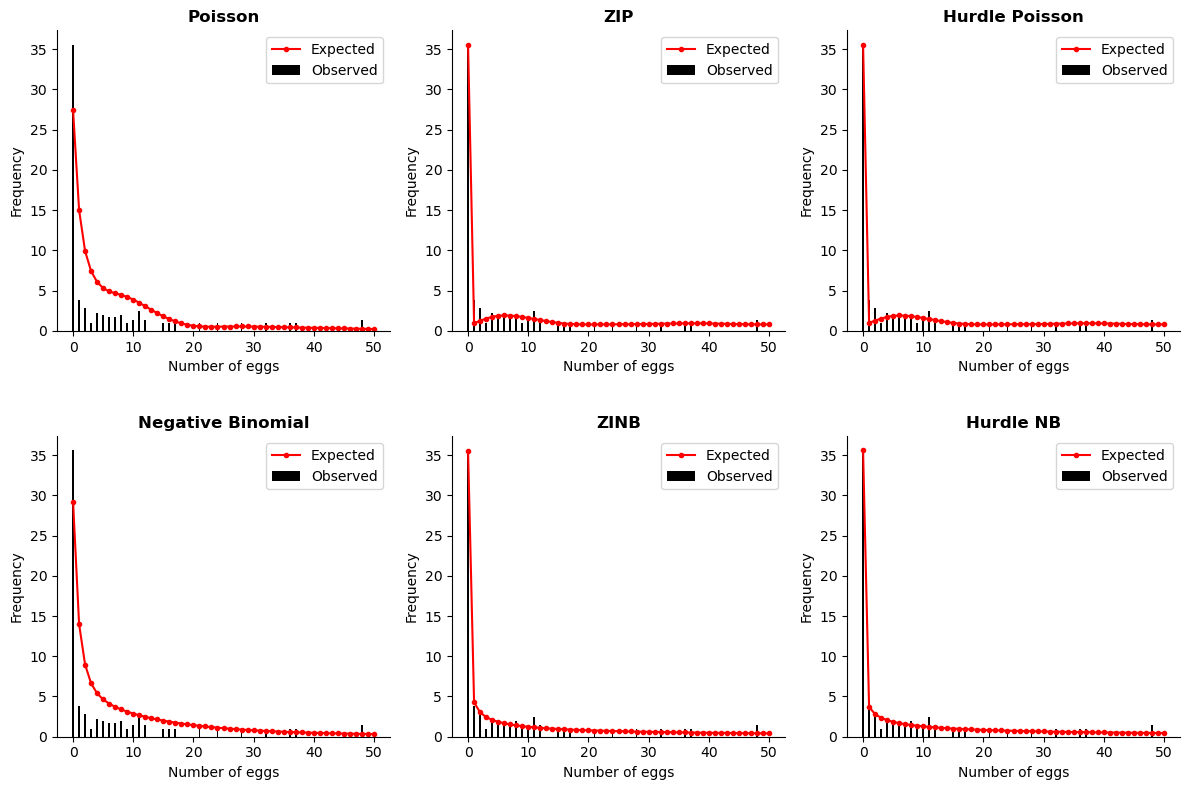

In [41]:
'''
ROOTOGRAMS - displaying expected values overlaid on observed values (in bars)

"poisson_results['height'].values[0:51]" represents the square root of the observed values and the first 51 values (including 0) and this is the same for any other dataframe named {modelname}_results since the observed values are equal for all

"poisson_results['line'].values[0:51]" represents the square root of the poisson model's expected values and the 'line' column for the other results represent their expected values

plt.bar - makes the bar plot
plt.plot - makes the line plot overlaid on the bar plot
'''


plt.figure(figsize = (12,8))

plt.subplot(2,3,1)
plt.bar(poisson_results['x'].values[:51], poisson_results['height'].values[0:51], width = 0.3, color = 'black', 
        label = 'Observed')
plt.plot(poisson_results['x'].values[:51], poisson_results['line'].values[0:51], '-o', color = 'red', markersize = 3, label = 'Expected')
plt.grid(False)
plt.legend()
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title('Poisson', fontweight='bold')
plt.xlabel('Number of eggs')
plt.ylabel('Frequency')
plt.xticks([0,10,20,30,40,50])



plt.subplot(2,3,4)
plt.bar(negbin_results['x'].values[:51], negbin_results['height'].values[0:51], width = 0.3, color = 'black', 
        label = 'Observed')
plt.plot(negbin_results['x'].values[:51], negbin_results['line'].values[0:51],  '-o', color = 'red', markersize = 3, label = 'Expected')
plt.grid(False)
plt.legend()
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title('Negative Binomial', fontweight='bold')
plt.xlabel('Number of eggs')
plt.ylabel('Frequency')
plt.xticks([0,10,20,30,40,50])



plt.subplot(2,3,2)
plt.bar(zip_results['x'].values[:51], zip_results['height'].values[0:51], width = 0.3, color = 'black', 
        label = 'Observed')
plt.plot(zip_results['x'].values[:51], zip_results['line'].values[0:51],  '-o', color = 'red', markersize = 3, label = 'Expected')
plt.grid(False)
plt.legend()
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title('ZIP', fontweight='bold')
plt.xlabel('Number of eggs')
plt.ylabel('Frequency')
plt.xticks([0,10,20,30,40,50])



plt.subplot(2,3,5)
plt.bar(zinb_results['x'].values[:51], zinb_results['height'].values[0:51], width = 0.3, color = 'black', 
        label = 'Observed')
plt.plot(zinb_results['x'].values[:51], zinb_results['line'].values[0:51],  '-o', color = 'red', markersize = 3, label = 'Expected')
plt.grid(False)
plt.legend()
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title('ZINB', fontweight='bold')
plt.xlabel('Number of eggs')
plt.ylabel('Frequency')
plt.xticks([0,10,20,30,40,50])



plt.subplot(2,3,3)
plt.bar(hurdlePoisson_results['x'].values[:51], hurdlePoisson_results['height'].values[0:51], width = 0.3, color = 'black', 
        label = 'Observed')
plt.plot(hurdlePoisson_results['x'].values[:51], hurdlePoisson_results['line'].values[0:51],  '-o', color = 'red', 
         markersize = 3, label = 'Expected')
plt.grid(False)
plt.legend()
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title('Hurdle Poisson', fontweight='bold')
plt.xlabel('Number of eggs')
plt.ylabel('Frequency')
plt.xticks([0,10,20,30,40,50])




plt.subplot(2,3,6)
plt.bar(hurdleNB_results['x'].values[:51], hurdleNB_results['height'].values[0:51], width = 0.3, color = 'black', 
        label = 'Observed')
plt.plot(hurdleNB_results['x'].values[:51], hurdleNB_results['line'].values[0:51], '-o', color = 'red', markersize = 3, 
         label = 'Expected')
plt.grid(False)
plt.legend()
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title('Hurdle NB', fontweight='bold')
plt.xlabel('Number of eggs')
plt.ylabel('Frequency')
plt.xticks([0,10,20,30,40,50])

plt.tight_layout(h_pad = 3)

plt.savefig('Figures\\figure3.eps', format = 'EPS', bbox_inches = 'tight')

plt.show()

In [42]:
'''
Getting the difference between the expected and observed values (residuals)

This was achieved by substracting the expected values from the observed values
'''

poisson_residuals = poisson_results['expected'] - poisson_results['observed']
negbin_residuals = negbin_results['expected'] - negbin_results['observed']
zip_residuals = zip_results['expected'] - zip_results['observed']
zinb_residuals = zinb_results['expected'] - zinb_results['observed']
hurdlePoisson_residuals = hurdlePoisson_results['expected'] - hurdlePoisson_results['observed']
hurdleNB_residuals = hurdleNB_results['expected'] - hurdleNB_results['observed']

### Model's residuals plot

In [44]:
'''
The square root of the difference between the expected and observed values

"{modelname}_r" is the assigned name given to the square root of the model residual.

Given that the value of the difference between the expected and observed values could be negative the "lambda" function named "find_sqrt" is defined to consider the following cases during computation.

Suppose x is a value then
- return the square root of x, if x >= 0 (zero or positive)
    else (if x is negative) return the negative of the square root of the absolute of x.

    So, if x is 16 the return value is 4
    Also, if x is -9, then the return value is -(sqrt(abs(-9))) = -3

The map function maps the each values in the model_results into the function, return a list with "list(map(...))", and converted into a numpy array then rounded to the nearest whole number
''' 

find_sqrt = lambda x: np.sqrt(x) if x>= 0 else -np.sqrt(abs(x))

poisson_r = np.array(list(map(find_sqrt, poisson_residuals))).round(0)

negbin_r = np.array(list(map(find_sqrt, negbin_residuals))).round(0)

zip_r = np.array(list(map(find_sqrt, zip_residuals))).round(0)

zinb_r = np.array(list(map(find_sqrt, zinb_residuals))).round(0)

hurdlePoisson_r = np.array(list(map(find_sqrt, hurdlePoisson_residuals))).round(0)

hurdleNB_r = np.array(list(map(find_sqrt, hurdleNB_residuals))).round(0)

[1, 4, 9, 16]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


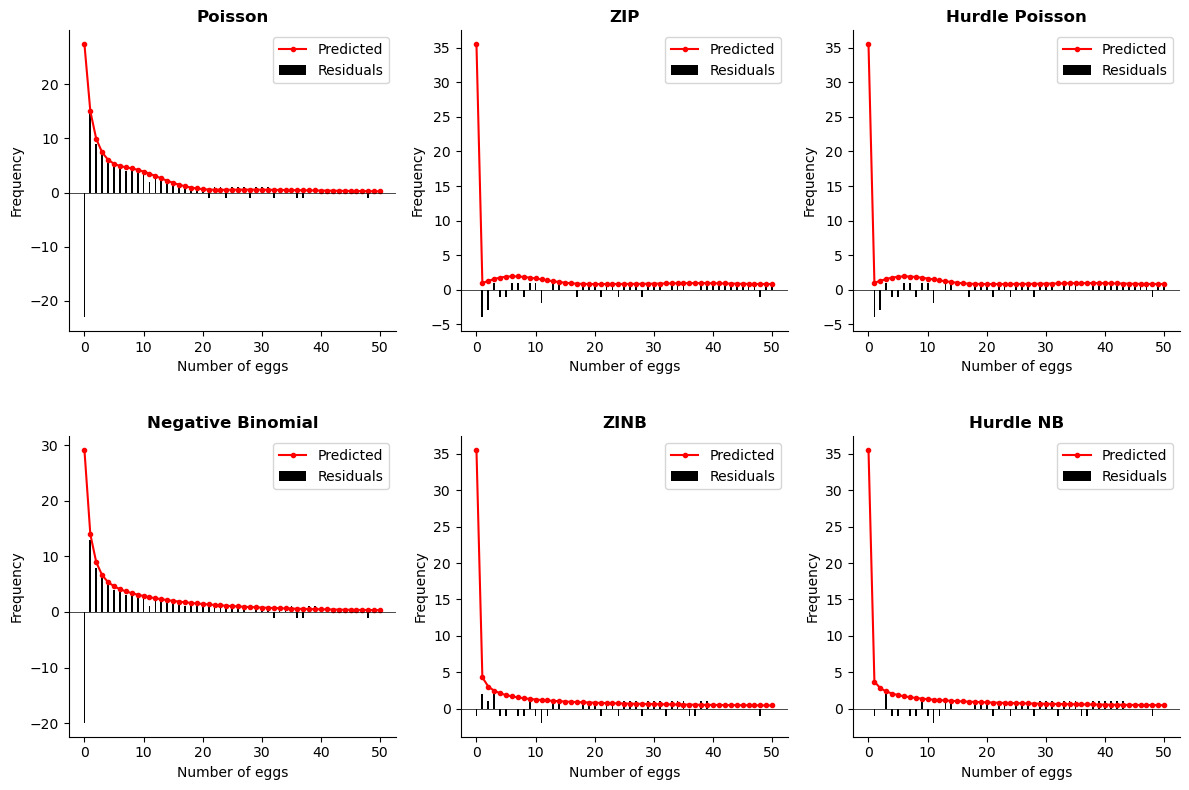

In [48]:
'''
This is a type of rootogram referred to as "suspended rootogram". This is displays the model residuals where the bars below the x-axis (y=0 line) indicates an underestimated expected value and then the bars above the same line shows an overestimated expected value. Secondary to the above standing rootogram one can also see underesitimated and overestimated values 

'''



plt.figure(figsize = (12,8))

plt.subplot(2,3,1)
plt.bar(poisson_results['x'].values[:51], poisson_r[0:51]
        , width = 0.3, color = 'black', label = 'Residuals')
plt.plot(poisson_results['x'].values[:51], poisson_results['line'].values[0:51], 
         '-o', color = 'red', markersize = 3, label = 'Predicted')
plt.grid(False)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title('Poisson', fontweight='bold')
plt.xlabel('Number of eggs')
plt.ylabel('Frequency')
plt.xticks([0,10,20,30,40,50])
plt.axhline(y=0, color='black', linewidth=0.5)
plt.legend()


plt.subplot(2,3,4)
plt.bar(negbin_results['x'].values[:51], negbin_r[0:51]
        , width = 0.3, color = 'black', label = 'Residuals')
plt.plot(negbin_results['x'].values[:51], negbin_results['line'].values[0:51], 
         '-o', color = 'red', markersize = 3, label = 'Predicted')
plt.grid(False)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title('Negative Binomial', fontweight='bold')
plt.xlabel('Number of eggs')
plt.ylabel('Frequency')
plt.xticks([0,10,20,30,40,50])
plt.axhline(y=0, color='black', linewidth=0.5)
plt.legend()


plt.subplot(2,3,2)
plt.bar(zip_results['x'].values[:51], zip_r[0:51]
        , width = 0.3, color = 'black', label = 'Residuals')
plt.plot(zip_results['x'].values[:51], zip_results['line'].values[0:51], 
         '-o', color = 'red', markersize = 3, label = 'Predicted')
plt.grid(False)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title('ZIP', fontweight='bold')
plt.xlabel('Number of eggs')
plt.ylabel('Frequency')
plt.xticks([0,10,20,30,40,50])
plt.axhline(y=0, color='black', linewidth=0.5)
plt.legend()


plt.subplot(2,3,5)
plt.bar(zinb_results['x'].values[:51], zinb_r[0:51]
        , width = 0.3, color = 'black', label = 'Residuals')
plt.plot(zinb_results['x'].values[:51], zinb_results['line'].values[0:51], 
         '-o', color = 'red', markersize = 3, label = 'Predicted')
plt.grid(False)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title('ZINB', fontweight='bold')
plt.xlabel('Number of eggs')
plt.ylabel('Frequency')
plt.xticks([0,10,20,30,40,50])
plt.axhline(y=0, color='black', linewidth=0.5)
plt.legend()



plt.subplot(2,3,3)
plt.bar(hurdlePoisson_results['x'].values[:51], hurdlePoisson_r[0:51]
        , width = 0.3, color = 'black', label = 'Residuals')
plt.plot(hurdlePoisson_results['x'].values[:51], hurdlePoisson_results['line'].values[0:51], 
         '-o', color = 'red', markersize = 3, label = 'Predicted')
plt.grid(False)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title('Hurdle Poisson', fontweight='bold')
plt.xlabel('Number of eggs')
plt.ylabel('Frequency')
plt.xticks([0,10,20,30,40,50])
plt.axhline(y=0, color='black', linewidth=0.5)
plt.legend()




plt.subplot(2,3,6)
plt.bar(hurdleNB_results['x'].values[:51], hurdleNB_r[0:51]
        , width = 0.3, color = 'black', label = 'Residuals')
plt.plot(hurdleNB_results['x'].values[:51], hurdleNB_results['line'].values[0:51], 
         '-o', color = 'red', markersize = 3, label = 'Predicted')
plt.grid(False)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title('Hurdle NB', fontweight='bold')
plt.xlabel('Number of eggs')
plt.ylabel('Frequency')
plt.xticks([0,10,20,30,40,50])
plt.axhline(y=0, color='black', linewidth=0.5)
plt.legend()
plt.tight_layout(h_pad = 3)

plt.savefig('Figures\\figure4.eps', format = 'EPS', bbox_inches = 'tight')

plt.show()